In [1]:
import json
import pandas as pd
from pandas import json_normalize
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
raw_data = open('DemoSampleData.json', "r")
rbm_json_data = json.loads(raw_data.read())
rbm_df = json_normalize(rbm_json_data)
rbm_df.head()

GENERIC_PERSONA_FILTER_SK  SECTOR  THERAPEUTIC_AREA_SK  \
0                       1117  Pharma                    6   
1                       1118  Pharma                    6   
2                       1119  Pharma                    6   
3                       1120  Pharma                    6   
4                       1121  Pharma                    6   

  THERAPEUTIC_AREA_CODE  COMPOUND_SK COMPOUND_CODE  INDICATION_SK  \
0              Oncology            1      54767414              1   
1              Oncology            1      54767414              1   
2              Oncology            1      54767414              1   
3              Oncology            1      54767414              1   
4              Oncology            1      54767414              1   

                INDICATION_ID                        TA_INDICATION  \
0  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
1  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
2  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
3  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   
4  ACUTE LYMPHOCYTIC LEUKEMIA  Oncology#ACUTE LYMPHOCYTIC LEUKEMIA   

   STUDY_PHASE_SK  ... COUNT_OF_SITES  ACCELERATED_VALUE SNAPSHOT_DATE_SK  \
0               7  ...              1      Required (LD)                7   
1               7  ...             30      Required (LD)                7   
2               7  ...             30      Required (LD)                7   
3               7  ...             30      Required (LD)                7   
4               7  ...             30      Required (LD)                7   

  TRENDING_COUNTRY_PROFILE_SCORE  RAG_COUNTRY_PROFILE_SCORE  \
0                            NaN                        NaN   
1                      NO_CHANGE                      GREEN   
2                      NO_CHANGE                      GREEN   
3                      NO_CHANGE                      GREEN   
4                      NO_CHANGE                      GREEN   

  TRENDING_SITE_PROFILE_SCORE TRENDING_STUDY_PROFILE_SCORE  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                        HIGH                    NO_CHANGE   
4                         NaN                          NaN   

  RAG_SITE_PROFILE_SCORE  RAG_STUDY_PROFILE_SCORE COUNTRY_MGMT_CRO  
0                    NaN                      NaN              NaN  
1                    NaN                      NaN              NaN  
2                    NaN                      NaN              NaN  
3                  GREEN                    AMBER              NaN  
4                    NaN                      NaN              NaN  

[5 rows x 54 columns]

In [3]:
rbm_df.shape

(186, 54)

In [4]:
print(rbm_df["GENERIC_PERSONA_FILTER_SK"][185] - rbm_df["GENERIC_PERSONA_FILTER_SK"][0], rbm_df["GENERIC_PERSONA_FILTER_SK"][0], rbm_df["GENERIC_PERSONA_FILTER_SK"][185])

185 1117 1302


In [5]:
rbm_df["TRENDING_SITE_PROFILE_SCORE"].value_counts()

HIGH             26
NOT AVAILABLE    25
NO_CHANGE        20
LOW              16
Name: TRENDING_SITE_PROFILE_SCORE, dtype: int64

In [6]:
rbm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   GENERIC_PERSONA_FILTER_SK       186 non-null    int64 
 1   SECTOR                          186 non-null    object
 2   THERAPEUTIC_AREA_SK             186 non-null    int64 
 3   THERAPEUTIC_AREA_CODE           186 non-null    object
 4   COMPOUND_SK                     186 non-null    int64 
 5   COMPOUND_CODE                   186 non-null    object
 6   INDICATION_SK                   186 non-null    int64 
 7   INDICATION_ID                   186 non-null    object
 8   TA_INDICATION                   186 non-null    object
 9   STUDY_PHASE_SK                  186 non-null    int64 
 10  STUDY_PHASE_NAME                186 non-null    object
 11  CLINICAL_STUDY_SK               186 non-null    int64 
 12  CLINICAL_STUDY_IDENTIFIER       186 non-null    ob

In [7]:
rbm_df['TRENDING_SITE_PROFILE_SCORE'].value_counts()

HIGH             26
NOT AVAILABLE    25
NO_CHANGE        20
LOW              16
Name: TRENDING_SITE_PROFILE_SCORE, dtype: int64

In [8]:
rbm_df['THERAPEUTIC_AREA_CODE'].value_counts()

Oncology    186
Name: THERAPEUTIC_AREA_CODE, dtype: int64

In [9]:
rbm_df['THERAPEUTIC_AREA_SK'].value_counts()

6    186
Name: THERAPEUTIC_AREA_SK, dtype: int64

In [10]:
rbm_df['STUDY_SITE_IDENTIFIER'].value_counts()

186     1
279     1
266     1
270     1
277     1
       ..
118     1
116     1
111     1
110     1
243     1
Name: STUDY_SITE_IDENTIFIER, Length: 186, dtype: int64

In [11]:
for e in rbm_df['CLINICAL_STUDY_IDENTIFIER'].value_counts().to_dict().items():
    print(e)

('TCS1003', 70)
('TCS1001', 62)
('TCS1002', 54)


In [3]:
userdata = { "data":[]}
dict1={}
for study in rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique():
    print(study, rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['REGION_COUNTRY'].value_counts().to_dict())
    dict1 = rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['REGION_COUNTRY'].value_counts().to_dict()
    print('--------------------')
    userdata["data"].append(dict1)

TCS1001 {'North America-United States of America (the)': 30, 'EMEA-United Kingdom of Great Britain and Northern Ireland (the)': 8, 'EMEA-France': 7, 'EMEA-Spain': 5, 'EMEA-Germany': 4, 'EMEA-Italy': 4, 'EMEA-Sweden': 1, 'EMEA-Israel': 1, 'EMEA-Netherlands (the)': 1, 'EMEA-Belgium': 1}
--------------------
TCS1002 {'North America-United States of America (the)': 54}
--------------------
TCS1003 {'North America-United States of America (the)': 33, 'EMEA-United Kingdom of Great Britain and Northern Ireland (the)': 7, 'EMEA-Germany': 6, 'EMEA-Spain': 5, 'EMEA-France': 5, 'EMEA-Belgium': 4, 'EMEA-Netherlands (the)': 4, 'Asia Pacific-Singapore': 3, 'EMEA-Israel': 2, 'EMEA-Saudi Arabia': 1}
--------------------


In [5]:
userdata1 = { "data":[]}
dict2={}
for study in rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique():
    print(study, rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['GLOBAL_REGION'].value_counts().to_dict())
    dict2 = rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['GLOBAL_REGION'].value_counts().to_dict()
    print('--------------------')
    userdata1["data"].append(dict2)

TCS1001 {'EMEA': 32, 'North America': 30}
--------------------
TCS1002 {'North America': 54}
--------------------
TCS1003 {'EMEA': 34, 'North America': 33, 'Asia Pacific': 3}
--------------------


In [4]:
for pie_entry in userdata['data']:
    print(pie_entry)
    #for entry in pie_entry.items():
        #print(entry)

{'North America-United States of America (the)': 30, 'EMEA-United Kingdom of Great Britain and Northern Ireland (the)': 8, 'EMEA-France': 7, 'EMEA-Spain': 5, 'EMEA-Germany': 4, 'EMEA-Italy': 4, 'EMEA-Sweden': 1, 'EMEA-Israel': 1, 'EMEA-Netherlands (the)': 1, 'EMEA-Belgium': 1}
{'North America-United States of America (the)': 54}
{'North America-United States of America (the)': 33, 'EMEA-United Kingdom of Great Britain and Northern Ireland (the)': 7, 'EMEA-Germany': 6, 'EMEA-Spain': 5, 'EMEA-France': 5, 'EMEA-Belgium': 4, 'EMEA-Netherlands (the)': 4, 'Asia Pacific-Singapore': 3, 'EMEA-Israel': 2, 'EMEA-Saudi Arabia': 1}


In [5]:
rbm_df['CLINICAL_STUDY_IDENTIFIER'].value_counts().sort_index()

TCS1001    62
TCS1002    54
TCS1003    70
Name: CLINICAL_STUDY_IDENTIFIER, dtype: int64

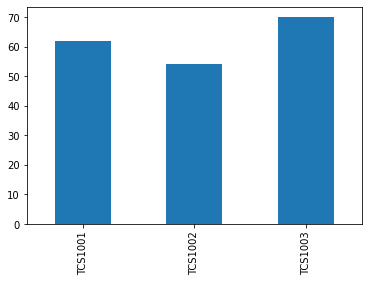

In [6]:
rbm_df['CLINICAL_STUDY_IDENTIFIER'].value_counts().sort_index().plot(kind='bar');

In [8]:
for study in rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique():
    print('------------')
    print(study)
    print('------------')
    print(rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['REGION_COUNTRY'].value_counts())

------------
TCS1001
------------
North America-United States of America (the)                       30
EMEA-United Kingdom of Great Britain and Northern Ireland (the)     8
EMEA-France                                                         7
EMEA-Spain                                                          5
EMEA-Germany                                                        4
EMEA-Italy                                                          4
EMEA-Sweden                                                         1
EMEA-Israel                                                         1
EMEA-Netherlands (the)                                              1
EMEA-Belgium                                                        1
Name: REGION_COUNTRY, dtype: int64
------------
TCS1002
------------
North America-United States of America (the)    54
Name: REGION_COUNTRY, dtype: int64
------------
TCS1003
------------
North America-United States of America (the)                       33
EMEA-Un

<AxesSubplot:ylabel='SITE_STATUS'>

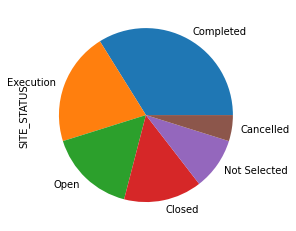

In [32]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['SITE_STATUS'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SITE_STATUS'>

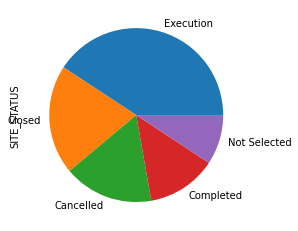

In [33]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1002"]['SITE_STATUS'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SITE_STATUS'>

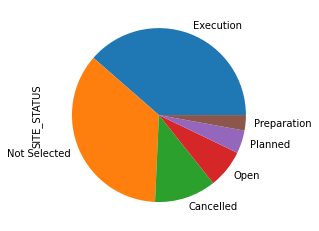

In [34]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1003"]['SITE_STATUS'].value_counts().plot(kind='pie')

In [11]:
color=["#4CC3D9", "#ff0000", "#00ff00", "#0000ff", "#bf0cf5", "#F2F903", "#888FFF", "#700FF9", "#999393", "#000000"]
#Bar_data
#-----------------------------------------------------------
a=0
temp=[]
dict2 = OrderedDict(sorted(rbm_df['CLINICAL_STUDY_IDENTIFIER'].value_counts().to_dict().items()))
for entry in dict2.items():
    dt={}
    dt['x'] = a
    dt['y'] = entry[1]
    dt['z'] = 0
    dt['size'] = 1
    dt['label']=entry[0]
    dt['color']=color[a]
    a += 1
    temp.append(dt)
#print(temp)
#temp.reverse()
#print(temp)
with open("./BarPie/Data/bar_data.json", "w") as outfile:
    json.dump(temp, outfile)
print('Bar data successfully generated.')


#Pie_data1
#----------------------------------------------------------

i=1
for pie_entry in userdata1['data']:
    temp_list=[]
    j=0
    for entry in pie_entry.items():
        d={}
        d['size']=entry[1]
        d['label']=entry[0]
        d['color']=color[j]
        j+=1
        temp_list.append(d)
    #temp_list.reverse()
    with open("./BarPie/Data/pie_data1{}.json".format(i), "w") as outfile:
            json.dump(temp_list, outfile)
    i += 1
print("Pie chart files successfully generated")

Bar data successfully generated.
Pie chart files successfully generated
Pie chart files successfully generated


In [134]:
for pie_entry in userdata['data']:
    for entry in pie_entry.items():
        print(entry)
    print("-----------------")

('Completed', 21)
('Execution', 13)
('Open', 10)
('Closed', 9)
('Not Selected', 6)
('Cancelled', 3)
-----------------
('Execution', 22)
('Closed', 11)
('Cancelled', 9)
('Completed', 7)
('Not Selected', 5)
-----------------
('Execution', 27)
('Not Selected', 25)
('Cancelled', 8)
('Open', 5)
('Planned', 3)
('Preparation', 2)
-----------------


In [148]:
for study in rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique():
    print(study)
    print(rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['SITE_STATUS'].value_counts())
    print('--------------------')

TCS1001
Completed       21
Execution       13
Open            10
Closed           9
Not Selected     6
Cancelled        3
Name: SITE_STATUS, dtype: int64
--------------------
TCS1002
Execution       22
Closed          11
Cancelled        9
Completed        7
Not Selected     5
Name: SITE_STATUS, dtype: int64
--------------------
TCS1003
Execution       27
Not Selected    25
Cancelled        8
Open             5
Planned          3
Preparation      2
Name: SITE_STATUS, dtype: int64
--------------------


In [31]:
rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique()

array(['TCS1001', 'TCS1002', 'TCS1003'], dtype=object)

In [32]:
dict1 = {}
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == study]['SITE_STATUS'].unique()

array(['Execution', 'Not Selected', 'Cancelled', 'Open', 'Preparation',
       'Planned'], dtype=object)

In [13]:
rbm_df['SITE_STATUS'].value_counts()

Execution       62
Not Selected    36
Completed       28
Closed          20
Cancelled       20
Open            15
Planned          3
Preparation      2
Name: SITE_STATUS, dtype: int64

In [14]:
rbm_df['TA_INDICATION'].value_counts()

Oncology#CANCER, MULTIPLE MYELOMA      124
Oncology#ACUTE LYMPHOCYTIC LEUKEMIA     62
Name: TA_INDICATION, dtype: int64

In [15]:
rbm_df['REGION_COUNTRY'].value_counts()

North America-United States of America (the)                       117
EMEA-United Kingdom of Great Britain and Northern Ireland (the)     15
EMEA-France                                                         12
EMEA-Spain                                                          10
EMEA-Germany                                                        10
EMEA-Netherlands (the)                                               5
EMEA-Belgium                                                         5
EMEA-Italy                                                           4
EMEA-Israel                                                          3
Asia Pacific-Singapore                                               3
EMEA-Sweden                                                          1
EMEA-Saudi Arabia                                                    1
Name: REGION_COUNTRY, dtype: int64

In [41]:
rbm_df['COMPOUND_CODE'].value_counts()

54767414    116
68284528     70
Name: COMPOUND_CODE, dtype: int64

In [75]:
rbm_df['GLOBAL_REGION'].value_counts()

North America    117
EMEA              66
Asia Pacific       3
Name: GLOBAL_REGION, dtype: int64

<AxesSubplot:>

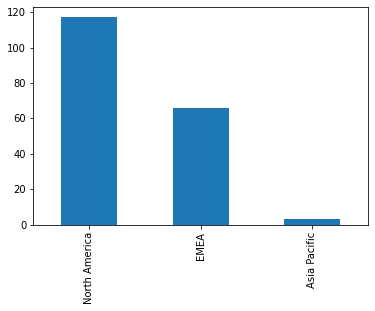

In [52]:
rbm_df['GLOBAL_REGION'].value_counts().plot(kind='bar')

In [50]:
rbm_df['REGION_COUNTRY'].value_counts()

North America-United States of America (the)                       117
EMEA-United Kingdom of Great Britain and Northern Ireland (the)     15
EMEA-France                                                         12
EMEA-Spain                                                          10
EMEA-Germany                                                        10
EMEA-Netherlands (the)                                               5
EMEA-Belgium                                                         5
EMEA-Italy                                                           4
EMEA-Israel                                                          3
Asia Pacific-Singapore                                               3
EMEA-Sweden                                                          1
EMEA-Saudi Arabia                                                    1
Name: REGION_COUNTRY, dtype: int64

<AxesSubplot:ylabel='REGION_COUNTRY'>

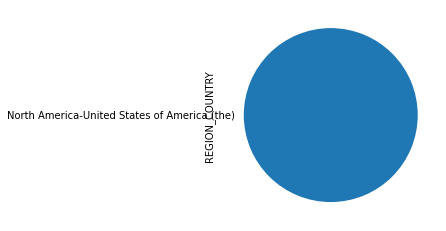

In [53]:
rbm_df[rbm_df['GLOBAL_REGION'] == "North America"]['REGION_COUNTRY'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'REGION_COUNTRY')

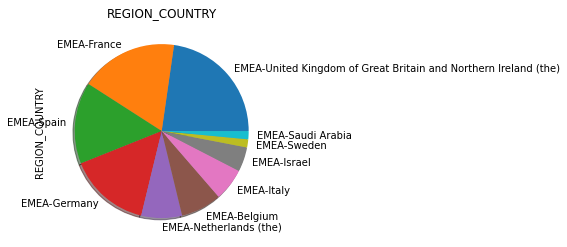

In [72]:
#autopct="%1.1f%%"
ax = rbm_df[rbm_df['GLOBAL_REGION'] == "EMEA"]['REGION_COUNTRY'].value_counts().plot(kind='pie', shadow=True)
ax.set_title('REGION_COUNTRY')

<AxesSubplot:ylabel='REGION_COUNTRY'>

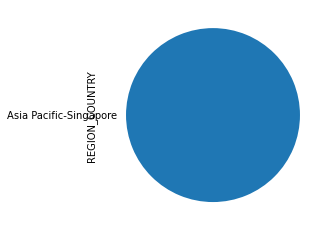

In [55]:
rbm_df[rbm_df['GLOBAL_REGION'] == "Asia Pacific"]['REGION_COUNTRY'].value_counts().plot(kind='pie')

In [63]:
rbm_df['COUNTRY_NAME'].value_counts()

United States of America (the)                                117
United Kingdom of Great Britain and Northern Ireland (the)     15
France                                                         12
Spain                                                          10
Germany                                                        10
Netherlands (the)                                               5
Belgium                                                         5
Italy                                                           4
Israel                                                          3
Singapore                                                       3
Sweden                                                          1
Saudi Arabia                                                    1
Name: COUNTRY_NAME, dtype: int64

<AxesSubplot:ylabel='REGION_COUNTRY'>

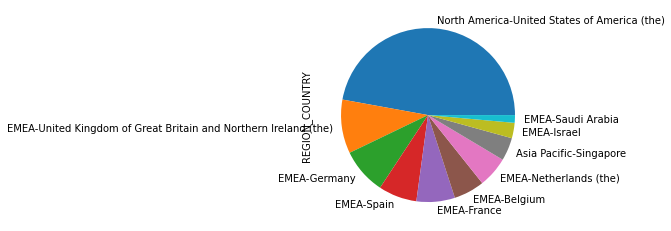

In [84]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1003"]['REGION_COUNTRY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='GLOBAL_REGION'>

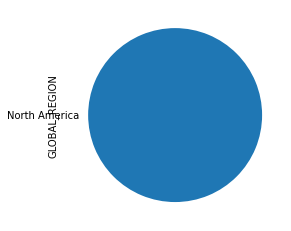

In [8]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1002"]['GLOBAL_REGION'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='REGION_COUNTRY'>

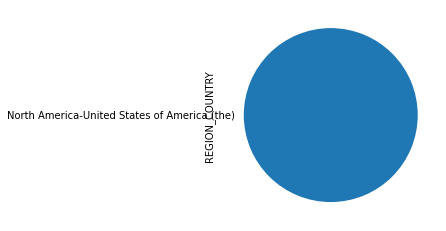

In [85]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1002"]['REGION_COUNTRY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='REGION_COUNTRY'>

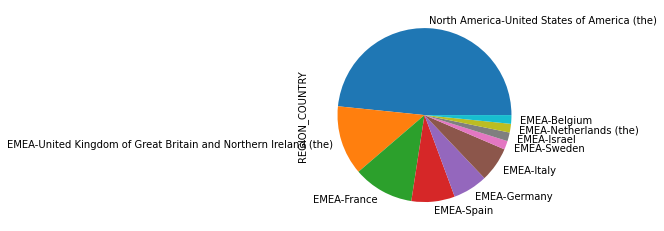

In [86]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['REGION_COUNTRY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='GLOBAL_REGION'>

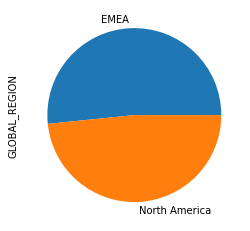

In [13]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['GLOBAL_REGION'].value_counts().plot(kind='pie')

In [34]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['GLOBAL_REGION'].value_counts()

EMEA             32
North America    30
Name: GLOBAL_REGION, dtype: int64

In [38]:
region_list = rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['GLOBAL_REGION'].unique()
region_list[0]

'EMEA'

In [63]:
rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique()

array(['TCS1001', 'TCS1002', 'TCS1003'], dtype=object)

In [ ]:
z=1
for pie_entry in userdata['data']:
    temp_list=[]
    j=0
    for entry in pie_entry.items():
        d={}
        d['size']=entry[1]
        d['label']=entry[0]
        d['color']=color[j]
        j+=1
        temp_list.append(d)
    #temp_list.reverse()
    with open("./BarPie/Data/pie_data2{}.json".format(z), "w") as outfile:
            json.dump(temp_list, outfile)
    z += 1
print("Pie chart files successfully generated")

In [65]:
e=1
for csi in rbm_df['CLINICAL_STUDY_IDENTIFIER'].unique():
    df_tcs = rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == csi]
    for cs in rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['GLOBAL_REGION'].unique():
        print(df_tcs[df_tcs['GLOBAL_REGION'] == cs]['REGION_COUNTRY'].value_counts())
        print('------------------------')
    print('#######################')
    e =+ 1

EMEA-United Kingdom of Great Britain and Northern Ireland (the)    8
EMEA-France                                                        7
EMEA-Spain                                                         5
EMEA-Germany                                                       4
EMEA-Italy                                                         4
EMEA-Sweden                                                        1
EMEA-Israel                                                        1
EMEA-Netherlands (the)                                             1
EMEA-Belgium                                                       1
Name: REGION_COUNTRY, dtype: int64
------------------------
North America-United States of America (the)    30
Name: REGION_COUNTRY, dtype: int64
------------------------
#######################
Series([], Name: REGION_COUNTRY, dtype: int64)
------------------------
North America-United States of America (the)    54
Name: REGION_COUNTRY, dtype: int64
------------------------
#

In [41]:
for en in rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['REGION_COUNTRY']:
    xyz = en.split('-')
    for region in region_list:
        if(region == xyz[0]):
            print(xyz[1])

Sweden
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
United States of America (the)
Spain
Spain
Spain
Spain
Spain
France
France
France
France
Franc

In [31]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['REGION_COUNTRY'].value_counts()

North America-United States of America (the)                       30
EMEA-United Kingdom of Great Britain and Northern Ireland (the)     8
EMEA-France                                                         7
EMEA-Spain                                                          5
EMEA-Germany                                                        4
EMEA-Italy                                                          4
EMEA-Sweden                                                         1
EMEA-Israel                                                         1
EMEA-Netherlands (the)                                              1
EMEA-Belgium                                                        1
Name: REGION_COUNTRY, dtype: int64

In [26]:
rbm_df[rbm_df['CLINICAL_STUDY_IDENTIFIER'] == "TCS1001"]['REGION_COUNTRY'][40:63]

40                                          EMEA-France
41                                          EMEA-France
42                                          EMEA-France
43                                         EMEA-Germany
44                                         EMEA-Germany
45                                         EMEA-Germany
46                                         EMEA-Germany
47    EMEA-United Kingdom of Great Britain and North...
48    EMEA-United Kingdom of Great Britain and North...
49    EMEA-United Kingdom of Great Britain and North...
50    EMEA-United Kingdom of Great Britain and North...
51    EMEA-United Kingdom of Great Britain and North...
52    EMEA-United Kingdom of Great Britain and North...
53    EMEA-United Kingdom of Great Britain and North...
54    EMEA-United Kingdom of Great Britain and North...
55                                          EMEA-Israel
56                                           EMEA-Italy
57                                           EME